In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Dataset/cust_data.xlsx')

In [4]:
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [6]:
list(df.columns)

['Cust_ID',
 'Gender',
 'Orders',
 'Jordan',
 'Gatorade',
 'Samsung',
 'Asus',
 'Udis',
 'Mondelez International',
 'Wrangler',
 'Vans',
 'Fila',
 'Brooks',
 'H&M',
 'Dairy Queen',
 'Fendi',
 'Hewlett Packard',
 'Pladis',
 'Asics',
 'Siemens',
 'J.M. Smucker',
 'Pop Chips',
 'Juniper',
 'Huawei',
 'Compaq',
 'IBM',
 'Burberry',
 'Mi',
 'LG',
 'Dior',
 'Scabal',
 'Tommy Hilfiger',
 'Hollister',
 'Forever 21',
 'Colavita',
 'Microsoft',
 'Jiffy mix',
 'Kraft']

In [9]:
df['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [10]:
copydf = df.copy()

In [11]:
copydf['Gender'].mode()

0    F
Name: Gender, dtype: object

In [12]:
copydf['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [15]:
copydf['Gender'].unique()

array(['M', 'F'], dtype=object)

In [20]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [18]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

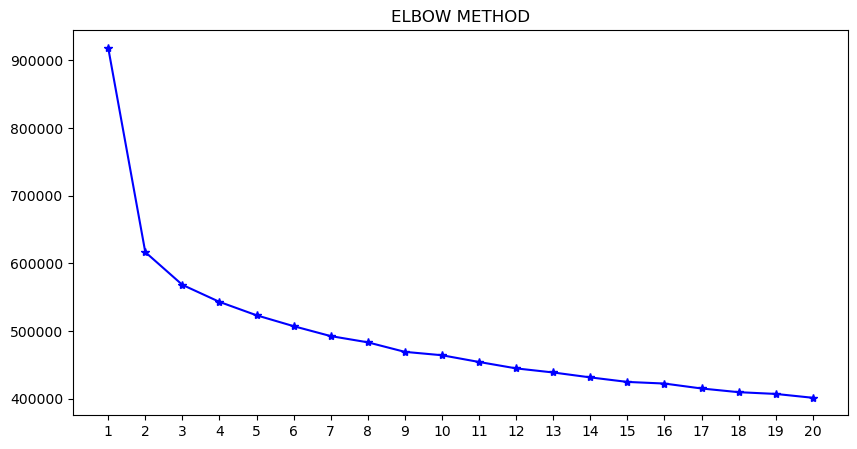

In [21]:
X1 = copydf.drop(['Cust_ID','Gender'], axis = 1)
inertia_List = []

for i in (range(1, 21)):
    kmean_model = KMeans(n_clusters = i).fit(X1)
    inertia_List.append(kmean_model.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,21,1), inertia_List,color = 'blue', marker = '*')
plt.title('ELBOW METHOD')
plt.xticks(range(1, 21))  # Setting x-axis ticks
plt.show()

In [22]:
final_kmeans_model = KMeans(n_clusters = 3).fit(X1)

inertia = final_kmeans_model.inertia_
print(f"Inertia : {inertia}")

Inertia : 568242.7903974752


In [23]:
labels = final_kmeans_model.labels_
silhouette_avg = silhouette_score(X1, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.20313881710635542


In [24]:
final_kmeans_model.labels_

array([2, 1, 2, ..., 1, 1, 0])

In [25]:
param_grid = {
    'n_clusters': range(2, 11),
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'tol': [1e-4, 1e-3, 1e-2],
    'random_state': [42]
}

best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params)
    kmeans.fit(X1)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X1, labels)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_params = params

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'random_state': 42, 'tol': 0.0001}
Best Silhouette Score: 0.33837516300865234


In [26]:
final_kmeans_model = KMeans(init = 'k-means++', max_iter = 100, random_state = 42, tol = 0.0001, n_clusters = 2).fit(X1)

labels = final_kmeans_model.labels_
silhouette_avg = silhouette_score(X1, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.33837516300865234


In [30]:
from sklearn.decomposition import PCA
principal=PCA(n_components=3)
principal.fit(X1)
x=principal.transform(X1)

Text(0, 0.5, 'pc2')

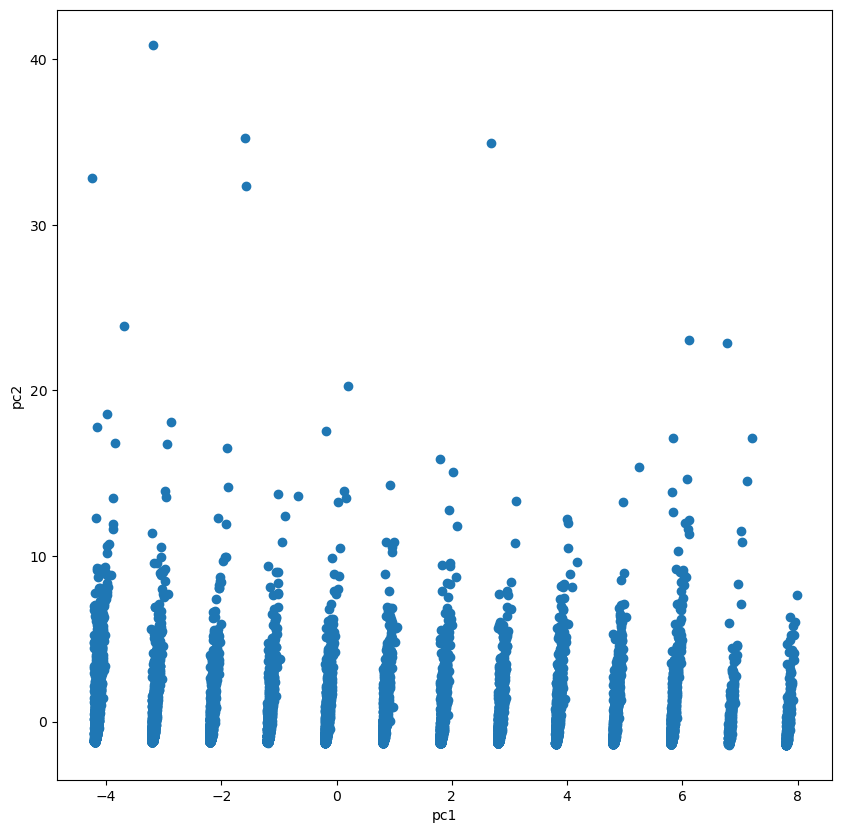

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

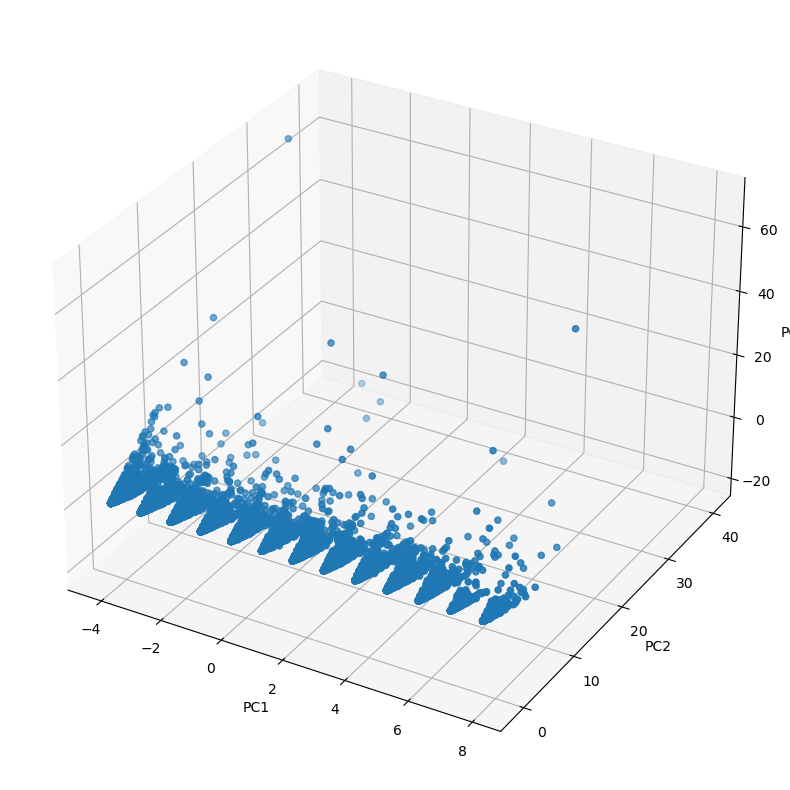

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [33]:
from sklearn.preprocessing import MinMaxScaler
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(X1)
scaled_data=model.transform(X1)

In [35]:
principal=PCA(n_components=3)
principal.fit(scaled_data)
x_scaled=principal.transform(scaled_data)

Text(0, 0.5, 'pc2')

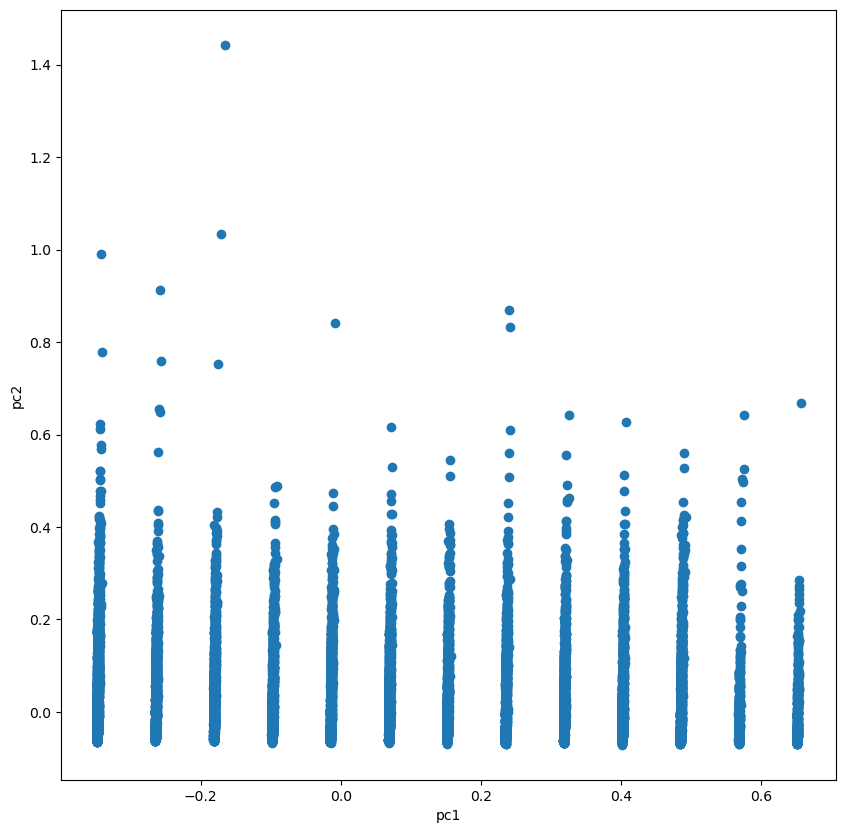

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(x_scaled[:,0],x_scaled[:,1],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

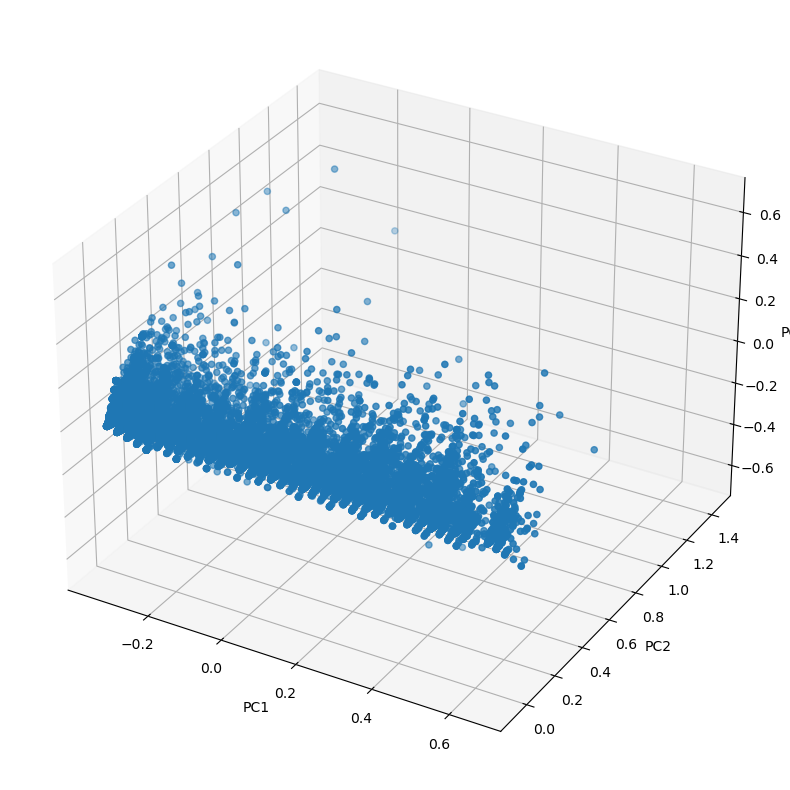

In [39]:
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_scaled[:,0],x_scaled[:,1],x_scaled[:,2],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [ ]:
from flask import Flask
import pandas as pd

app = Flask(__name__)

# Example DataFrame (replace this with your actual data)
df = pd.read_excel('Dataset/cust_data.xlsx')
@app.route('/full-data')
def full_data():
    # Convert the DataFrame to an HTML table
    html_table = df.to_html()

    # Return the HTML table as a response
    return html_table

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
